## 데이터 전처리 실습

### 실습 데이터셋 안내

- 2022년 1~12월에 앱 사용성 내역입니다.<br>

- 변수(열)에 대한 간단한 설명입니다.

| 열이름 | 설명 | 특징 |
| :----- | :--- | :--- |
| country | 국가 코드 | KR: 한국, JP: 일본, AU: 호주, US: 미국, <br> BR: 브라질, GB: 영국, DE: 독일, FR: 프랑스 |
| product | webOS version | webOS6.0만 제공 |
| chipset | TV 칩셋 정보 | lm21a, lm21u, o20, e60F20, k7lp |
| inch | TV 화면 크기 | 43, 55, 65, 75 |
| app_name | 앱 이름 | app1 ~ app5로 가명 처리 |
| use_month | 앱 사용월 | 2022-1 ~ 2022-12 |
| use_tv_cnt | 해당 월에 해당 앱을 사용한 TV 대수 | 수치형 |
| total_use_count | 해당 월에 해당 앱을 실행한 전체 횟수 | 수치형 |
| total_use_hour | 해당 월에 해당 앱을 사용한 전체 시간 | 수치형 |
| monthly_avg_use_count | 해당 월에 평균 실행 횟수 | 수치형 |
| monthly_avg_use_hour | 해당 월에 평균 사용 시간 | 수치형 |

- 실습 데이터인 **'App_Usage.csv'** 파일은 data 폴더에 있습니다.
  - 구분자는 콤마(,)이고 인코딩 방식은 **ASCII**입니다.

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import chardet
import numpy as np
import pandas as pd
import joblib

In [2]:
# Jupyter Notebook에서 실수를 소수점 셋째 자리까지 출력하도록 설정합니다.
%precision 3

'%.3f'

In [3]:
# pandas 객체에서 실수를 소수점 셋째 자리까지 출력하도록 설정합니다.
pd.options.display.precision = 3

In [4]:
# pandas 객체에서 과학적 표기법 적용을 해제하도록 설정합니다.
pd.options.display.float_format = lambda x: f'{x:.3f}'

### 작업 경로 확인 및 변경

In [5]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'C:\\Users\\hdsce\\Documents\\PythonDataAnalysis1\\project'

In [6]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [7]:
# 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

['App_Usage.csv',
 'APT_Detail_Seoul_2022.csv',
 'APT_Detail_Seoul_2022.xlsx',
 'APT_Merged.csv',
 'APT_Merged.xlsx',
 'APT_Prep.csv',
 'APT_Price_Seoul_2020_2022.csv',
 'APT_Price_Seoul_2020_2022.xlsx',
 'APT_Price_Seoul_Copy.xlsx',
 'merged.xlsx',
 'NA_Sample.xlsx',
 'Online_Mall.csv',
 'Online_Mall_Merged.xlsx',
 'Online_Mall_Prep.z',
 'Online_Mall_Rawdat.xlsx',
 'pivot_table.xlsx',
 'sample.png',
 'sample1.png',
 'sample2.png',
 'sample3.png',
 'test.csv',
 'test.xlsx',
 'test.z']

### 문자 인코딩 방식 확인

In [8]:
# csv 파일명을 변수에 할당합니다. 여러 번 재사용하기 위함입니다.
fileName = 'App_Usage.csv'

In [9]:
# csv 파일을 bytes 문자열로 읽고 text에 할당합니다.
# [힌트] with 문, open() 및 read() 함수를 사용하세요.
with open(file = fileName, mode = 'rb') as file:
    text = file.read()

In [10]:
# 바이너리 텍스트의 인코딩 방식을 확인합니다.
# [힌트] chardet.detect() 함수를 사용하세요.
chardet.detect(text)

{'encoding': 'ascii', 'confidence': 1.000, 'language': ''}

### 실습 데이터셋 준비

In [11]:
# 링크를 읽고 데이터프레임 rawdat를 생성합니다.
# [힌트] pd.read_csv() 함수를 사용하세요.
# [참고] 문자 인코딩 방식이 ASCII와 UTF-8이면 encoding 매개변수를 생략할 수 있습니다.
rawdat = pd.read_csv(filepath_or_buffer = fileName)

In [12]:
# rawdat의 정보를 확인합니다.
# [힌트] info() 함수를 사용하세요.
rawdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6824 entries, 0 to 6823
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                6824 non-null   object 
 1   product                6824 non-null   object 
 2   chipset                6824 non-null   object 
 3   inch                   6824 non-null   int64  
 4   app_name               6824 non-null   object 
 5   use_month              6824 non-null   object 
 6   use_tv_cnt             6824 non-null   int64  
 7   total_use_count        6824 non-null   float64
 8   total_use_hour         6824 non-null   float64
 9   monthly_avg_use_count  6824 non-null   float64
 10  monthly_avg_use_hour   6824 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 586.6+ KB


In [13]:
# rawdat의 처음 5행을 출력합니다.
# [힌트] head() 함수를 사용하세요.
rawdat.head()

,country,product,chipset,inch,app_name,use_month,use_tv_cnt,total_use_count,total_use_hour,monthly_avg_use_count,monthly_avg_use_hour
0,AU,webOSTV 6.0,lm21a,75,app2,2022-12,21875,666597.000,896872.021,24.371,32.414
1,KR,webOSTV 6.0,lm21u,55,app2,2022-9,29645,510344.000,694226.376,14.919,19.982
2,KR,webOSTV 6.0,o20,55,app4,2022-8,7690,171398.000,227124.473,18.450,23.849
3,JP,webOSTV 6.0,o20,55,app1,2022-12,5686,69985.000,71767.525,11.582,11.724
4,AU,webOSTV 6.0,lm21a,43,app5,2022-8,4721,35920.000,56835.776,6.628,9.649


In [14]:
# rawdat의 마지막 5행을 출력합니다.
# [힌트] tail() 함수를 사용하세요.
rawdat.tail()

,country,product,chipset,inch,app_name,use_month,use_tv_cnt,total_use_count,total_use_hour,monthly_avg_use_count,monthly_avg_use_hour
6819,GB,webOSTV 6.0,k7lp,55,app3,2022-4,40,57.000,11.854,1.387,0.296
6820,FR,webOSTV 6.0,k7lp,65,app5,2022-3,12,21.000,2.160,1.750,0.180
6821,GB,webOSTV 6.0,e60F20,75,app3,2022-12,14,52.000,39.429,3.286,2.439
6822,DE,webOSTV 6.0,e60F20,55,app5,2022-7,1,17.000,17.758,17.000,17.758
6823,FR,webOSTV 6.0,o20,65,app3,2022-2,19,40.000,17.759,2.105,0.935


### 실습 데이터셋 전처리

In [15]:
# inch 열의 자료형을 문자열로 변환합니다.
rawdat['inch'].astype(str)

0       75
1       55
2       55
3       55
4       43
        ..
6819    55
6820    65
6821    75
6822    55
6823    65
Name: inch, Length: 6824, dtype: object

In [16]:
# 위 코드 실행 결과를 inch 열에 재할당합니다.
rawdat['inch'] = rawdat['inch'].astype(str)

In [17]:
# use_month 열에 일(day)을 추가한 결과를 출력합니다.
# [참고] 시리즈의 모든 원소가 문자열이면 결합할 수 있습니다.
rawdat['use_month'] + '-1'

0       2022-12-1
1        2022-9-1
2        2022-8-1
3       2022-12-1
4        2022-8-1
          ...    
6819     2022-4-1
6820     2022-3-1
6821    2022-12-1
6822     2022-7-1
6823     2022-2-1
Name: use_month, Length: 6824, dtype: object

In [18]:
# use_month 열에 일(day)을 추가한 결과를 출력합니다.
# [참고] 시리즈의 map() 함수를 사용하면 원소마다 반복 실행합니다.
# [참고] 람다 표현식에 익숙해지면 없는 함수를 만들어 사용할 수 있습니다.
rawdat['use_month'].map(arg = lambda x: x + '-1')

0       2022-12-1
1        2022-9-1
2        2022-8-1
3       2022-12-1
4        2022-8-1
          ...    
6819     2022-4-1
6820     2022-3-1
6821    2022-12-1
6822     2022-7-1
6823     2022-2-1
Name: use_month, Length: 6824, dtype: object

In [19]:
# 위 코드 실행 결과를 새 변수 use_date 열에 할당합니다.
rawdat['use_date'] = rawdat['use_month'].map(arg = lambda x: x + '-1')

In [20]:
# use_date 열을 날짜시간형으로 변환한 결과를 출력합니다.
# [힌트] astype() 함수에 'datetime64[ns]'을 지정하세요.
rawdat['use_date'].astype('datetime64[ns]')

0      2022-12-01
1      2022-09-01
2      2022-08-01
3      2022-12-01
4      2022-08-01
          ...    
6819   2022-04-01
6820   2022-03-01
6821   2022-12-01
6822   2022-07-01
6823   2022-02-01
Name: use_date, Length: 6824, dtype: datetime64[ns]

In [21]:
# 위 코드 실행 결과를 use_date 열에 할당하여 변경합니다.
rawdat['use_date'] = rawdat['use_date'].astype(str).astype('datetime64[ns]')

In [22]:
# use_date 열에서 'yyyy년 mm월' 형태의 문자열을 추출한 결과를 출력합니다.
# [힌트] dt.strftime() 함수의 date_format 매개변수에 날짜 포맷을 지정하세요.
rawdat['use_date'].dt.strftime(date_format = '%Y년 %m월')

0       2022년 12월
1       2022년 09월
2       2022년 08월
3       2022년 12월
4       2022년 08월
          ...    
6819    2022년 04월
6820    2022년 03월
6821    2022년 12월
6822    2022년 07월
6823    2022년 02월
Name: use_date, Length: 6824, dtype: object

In [23]:
# 위 코드 실행 결과를 use_month 열에 할당합니다.
rawdat['use_month'] = rawdat['use_date'].dt.strftime(date_format = '%Y년 %m월')

In [24]:
# rawdat의 처음 5행을 출력합니다.
rawdat.head()

,country,product,chipset,inch,app_name,use_month,use_tv_cnt,total_use_count,total_use_hour,monthly_avg_use_count,monthly_avg_use_hour,use_date
0,AU,webOSTV 6.0,lm21a,75,app2,2022년 12월,21875,666597.000,896872.021,24.371,32.414,2022-12-01
1,KR,webOSTV 6.0,lm21u,55,app2,2022년 09월,29645,510344.000,694226.376,14.919,19.982,2022-09-01
2,KR,webOSTV 6.0,o20,55,app4,2022년 08월,7690,171398.000,227124.473,18.450,23.849,2022-08-01
3,JP,webOSTV 6.0,o20,55,app1,2022년 12월,5686,69985.000,71767.525,11.582,11.724,2022-12-01
4,AU,webOSTV 6.0,lm21a,43,app5,2022년 08월,4721,35920.000,56835.776,6.628,9.649,2022-08-01


### 기술통계량 확인

In [25]:
# rawdat의 수치형(정수 또는 실수) 변수의 기술통계량을 확인합니다.
# [힌트] describe() 함수를 사용하세요.
rawdat.describe()

,use_tv_cnt,total_use_count,total_use_hour,monthly_avg_use_count,monthly_avg_use_hour
count,6824.000,6824.000,6824.000,6824.000,6824.000
mean,11027.572,183405.346,262520.350,8.111,9.422
std,23934.398,513982.727,789957.917,6.895,9.982
min,1.000,1.000,0.003,1.000,0.003
25%,59.000,268.000,183.612,2.656,1.638
50%,898.500,5687.500,4931.092,5.614,5.734
75%,10335.000,124937.000,153677.479,12.442,16.177
max,216272.000,6285911.000,9443137.832,68.500,151.883


In [26]:
# rawdat의 범주형 변수의 기술통계량을 확인합니다.
# [힌트] describe() 함수의 include 매개변수에 자료형을 지정하세요.
rawdat.describe(include = object)

,country,product,chipset,inch,app_name,use_month
count,6824,6824,6824,6824,6824,6824
unique,8,1,5,4,5,12
top,GB,webOSTV 6.0,lm21a,65,app2,2022년 09월
freq,917,6824,1914,2206,1379,605


In [27]:
# country 열의 빈도수를 인덱스로 정렬하여 출력합니다.
# [힌트] value_counts()와 sort_index() 함수를 사용하세요.
rawdat['country'].value_counts().sort_index()

AU    825
BR    894
DE    910
FR    888
GB    917
JP    670
KR    820
US    900
Name: country, dtype: int64

In [28]:
# chipset 열의 빈도수를 인덱스로 정렬하여 출력합니다.
rawdat['chipset'].value_counts().sort_index()

e60F20     937
k7lp      1582
lm21a     1914
lm21u     1429
o20        962
Name: chipset, dtype: int64

In [29]:
# inch 열의 빈도수를 인덱스로 정렬하여 출력합니다.
rawdat['inch'].value_counts().sort_index()

43     849
55    2097
65    2206
75    1672
Name: inch, dtype: int64

In [30]:
# app_name 열의 빈도수를 인덱스로 정렬하여 출력합니다.
rawdat['app_name'].value_counts().sort_index()

app1    1371
app2    1379
app3    1332
app4    1376
app5    1366
Name: app_name, dtype: int64

In [31]:
# use_month 열의 빈도수를 인덱스로 정렬하여 출력합니다.
rawdat['use_month'].value_counts().sort_index()

2022년 01월    481
2022년 02월    493
2022년 03월    473
2022년 04월    568
2022년 05월    599
2022년 06월    602
2022년 07월    600
2022년 08월    602
2022년 09월    605
2022년 10월    599
2022년 11월    601
2022년 12월    601
Name: use_month, dtype: int64

### 실습 항목 예시

1. 국가(index)별 칩셋(columns)에 따른 use_tv_cnt(values)의 합계와 평균(aggfunc)
1. 국가(index)별 인치(columns)에 따른 use_tv_cnt(values)의 합계와 평균(aggfunc)
1. 국가(index)별 App(columns)에 따른 use_tv_cnt(values)의 합계와 평균(aggfunc)

이외에 관심 있는 내용을 직접 확인해보세요.

In [33]:
rawdat.columns

Index(['country', 'product', 'chipset', 'inch', 'app_name', 'use_month',
       'use_tv_cnt', 'total_use_count', 'total_use_hour',
       'monthly_avg_use_count', 'monthly_avg_use_hour', 'use_date'],
      dtype='object')

In [34]:
pd.pivot_table(
    data = rawdat, 
    values = 'use_tv_cnt', 
    index = 'country', 
    columns = 'chipset', 
    aggfunc = [np.sum, np.mean], 
    sort = False
)

sum                                        mean            \
chipset     lm21a    lm21u      o20 e60F20     k7lp     lm21a     lm21u   
country                                                                   
AU        1930930   486832  1143239   9930     8116  8045.542  2704.622   
KR        1416635  1723458   853292   3109     6024  5927.343  9574.767   
JP         240599   160035   238672    848    10135  1023.826   904.153   
US       15764033  3912716  9509579  48858  5637105 65683.471 21737.311   
BR        7950538   802650   928889  27181  3240566 33127.242  4639.595   
FR        1059252   636899  1065925   1320   436645  4413.550  3538.328   
DE        1430218  2071238  2560631   7614  1438431  5959.242 11506.878   
GB        2698858  1360728  1952246  23508  2454670 11245.242  7601.832   

                                     
chipset       o20  e60F20      k7lp  
country                              
AU       9526.992 104.526    42.716  
KR       6994.197  32.726    32.739  
JP       1988.933   9.636   202.700  
US      79246.492 407.150 23487.938  
BR       7740.742 166.755 16366.495  
FR       8882.708  12.222  1819.354  
DE      21338.592  58.569  5993.462  
GB      16268.717 170.348 10227.792

## 데이터 시각화 실습

- rawdat으로 다양한 그래프를 그립니다.

### 관련 라이브러리 호출

In [35]:
# 관련 라이브러리를 호출합니다.
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# 그래픽 파라미터를 설정합니다.
plt.rc(group = 'font', family = 'Gowun Dodum', size = 10)
plt.rc(group = 'figure', figsize = (8, 4), dpi = 100)
plt.rc(group = 'axes', unicode_minus = False)
plt.rc(group = 'legend', frameon = True, fc = '1', ec = '0')

### 실습 항목 예시

1. use_month(x축)별 use_tv_cnt(y축)의 변화량 비교
1. use_month(x축)별 use_tv_cnt(y축)의 국가(hue)별 변화량 비교
1. use_month(x축)별 use_tv_cnt(y축)의 칩셋(hue)별 변화량 비교
1. use_month(x축)별 use_tv_cnt(y축)의 인치(hue)별 변화량 비교
1. use_month(x축)별 use_tv_cnt(y축)의 App(hue)별 변화량 비교

이외에 관심 있는 내용을 직접 확인해보세요.

In [42]:
months = rawdat['use_month'].unique()
months.sort()

In [43]:
months

array(['2022년 01월', '2022년 02월', '2022년 03월', '2022년 04월', '2022년 05월',
       '2022년 06월', '2022년 07월', '2022년 08월', '2022년 09월', '2022년 10월',
       '2022년 11월', '2022년 12월'], dtype=object)

In [45]:
rawdat = rawdat.sort_values(by = ['use_month'])

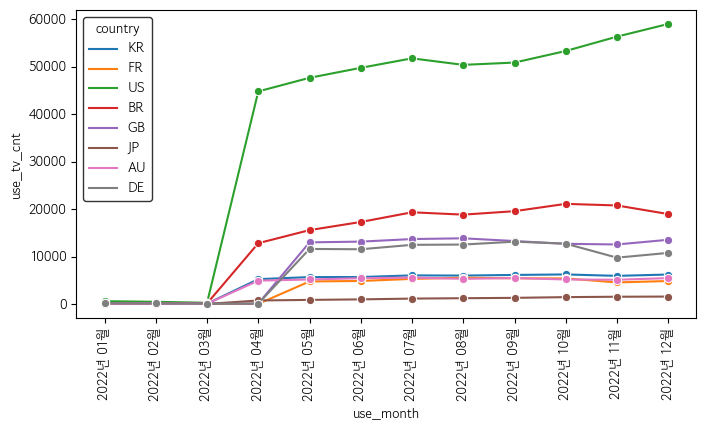

In [48]:
sns.lineplot(data = rawdat, x = 'use_month', y = 'use_tv_cnt', hue = 'country', 
             estimator = np.mean, errorbar = None, marker = 'o')
plt.xticks(rotation = 90);

## End of Document